<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install catboost

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/amankharwal/Website-data/refs/heads/master/weatherAUS.csv' #load dataset :)
df = pd.read_csv(url)

In [5]:
df.shape #142193 rows, 24 columns

(142193, 24)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [9]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [10]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0,0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,0


In [11]:
dir_to_deg = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

df['WindDir9am'] = df['WindDir9am'].map(dir_to_deg)
df['WindDir3pm'] = df['WindDir3pm'].map(dir_to_deg)
df['WindGustDir'] = df['WindGustDir'].map(dir_to_deg)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  float64
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  float64
 10  WindDir3pm     138415 non-null  float64
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  float64       
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  float64       
 10  WindDir3pm     138415 non-null  float64       
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

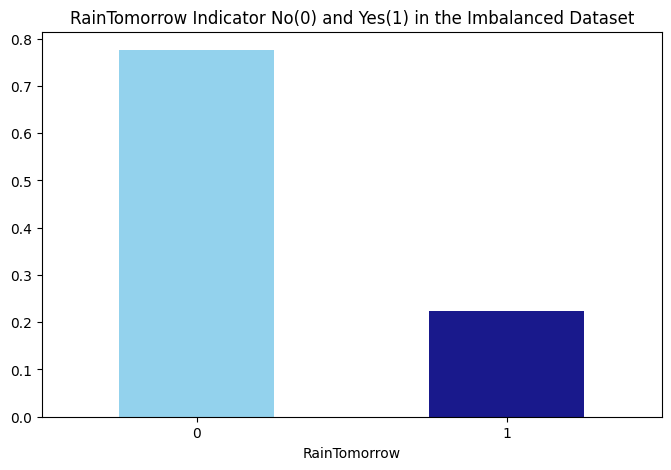

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

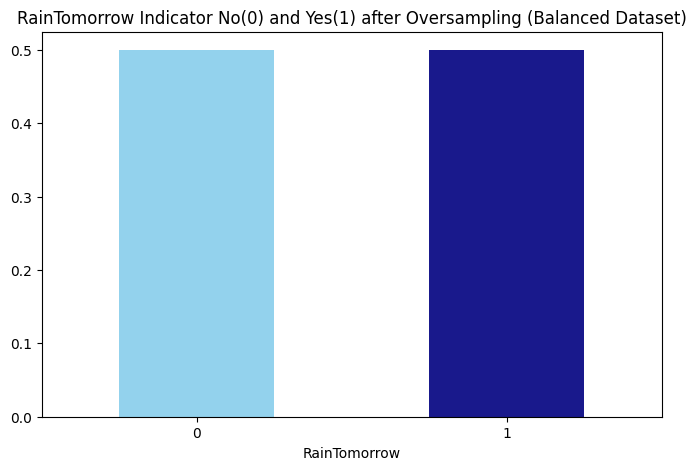

In [16]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

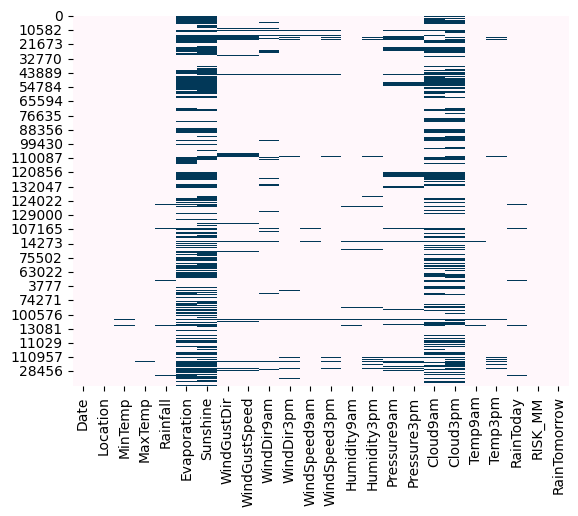

In [17]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [18]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [19]:
df[["Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"]].dtypes

,0
Sunshine,float64
Evaporation,float64
Cloud3pm,float64
Cloud9am,float64


In [20]:
for col in ["Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"]:
    unique_vals = df[col].dropna().unique()
    print(f"{col} — {len(unique_vals)} unique values")
    print(f"Sample: {sorted(unique_vals)[:10]}")
    print()

#Sunshine, Evaporation are Continous, Cloud3pm and Cloud9am are Categorical

Sunshine — 145 unique values
Sample: [np.float64(0.0), np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]

Evaporation — 356 unique values
Sample: [np.float64(0.0), np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]

Cloud3pm — 10 unique values
Sample: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]

Cloud9am — 10 unique values
Sample: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]



In [21]:
df["Cloud3pm"].value_counts() #apparently 9.0 is outlier

,count
Cloud3pm,
7.0,34124
8.0,29306
1.0,16895
6.0,14276
5.0,10091
3.0,9029
2.0,8669
4.0,7588
0.0,5039


In [22]:
# Median Imputer for continuous features
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df[["Sunshine", "Evaporation"]] = median_imputer.fit_transform(df[["Sunshine", "Evaporation"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["Cloud3pm", "Cloud9am"]] = mode_imputer.fit_transform(df[["Cloud3pm", "Cloud9am"]])

In [23]:
numeric_cols = df.select_dtypes(include=['float64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5 * IQR for all numeric columns
df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

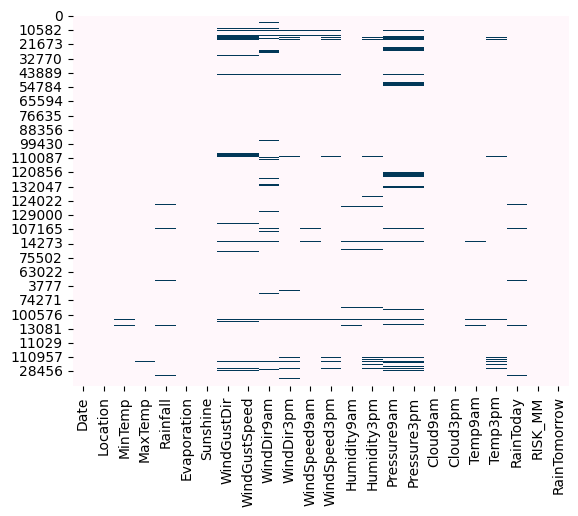

In [24]:
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [25]:
df.shape

(220632, 24)

In [26]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,220632,219550.000000,220161.000000,217508.000000,220632.000000,220632.000000,205141.000000,205278.000000,205904.000000,214192.00000,...,214601.000000,198904.000000,198886.00000,220632.000000,220632.000000,218979.000000,216074.000000,217508.000000,220632.000000,220632.000000
mean,2013-03-25 10:45:09.104753408,12.522257,22.454739,3.674979,4.815321,6.640840,173.906252,42.048602,166.145995,174.97061,...,57.618585,1016.494868,1014.20766,5.766911,5.894004,16.858659,20.789089,0.309676,5.172102,0.500000
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,...,0.000000,980.500000,977.10000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,2010-12-28 00:00:00,7.900000,17.200000,0.000000,4.000000,6.500000,90.000000,31.000000,67.500000,90.00000,...,42.000000,1011.700000,1009.30000,5.000000,5.000000,12.100000,15.700000,0.000000,0.000000,0.000000
50%,2013-05-13 00:00:00,12.200000,21.800000,0.000000,4.400000,6.800000,180.000000,41.000000,157.500000,180.00000,...,58.000000,1016.500000,1014.20000,7.000000,7.000000,16.500000,20.100000,0.000000,1.050000,0.500000
75%,2015-06-09 00:00:00,17.200000,27.400000,2.200000,5.000000,7.200000,270.000000,50.000000,270.000000,270.00000,...,73.000000,1021.400000,1019.10000,7.000000,7.000000,21.400000,25.500000,1.000000,5.200000,1.000000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,337.500000,135.000000,337.500000,337.50000,...,100.000000,1041.000000,1039.60000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000
std,NaN,6.389343,7.112835,11.131122,3.019808,2.856932,102.803486,14.628039,108.209092,102.93390,...,21.825840,7.351730,7.29113,2.400679,2.231527,6.450944,6.938701,0.462361,12.101490,0.500001


In [27]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,3124
Evaporation,0
Sunshine,0
WindGustDir,15491
WindGustSpeed,15354
WindDir9am,14728


In [28]:
category_distribution = df['WindDir9am'].value_counts(dropna=False, normalize=True) * 100
print(category_distribution)

WindDir9am
0.0      9.116085
NaN      6.675369
315.0    6.528065
337.5    6.288299
270.0    6.169549
22.5     5.875394
225.0    5.872222
135.0    5.850919
157.5    5.844121
180.0    5.744860
90.0     5.578067
292.5    5.389971
202.5    5.230429
45.0     5.172867
67.5     5.035534
247.5    4.960296
112.5    4.667954
Name: proportion, dtype: float64


In [29]:
# Median Imputer for continuous features
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df[["Pressure9am", "Pressure3pm"]] = median_imputer.fit_transform(df[["Pressure9am", "Pressure3pm"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["WindGustDir", "WindDir9am", "WindDir3pm"]] = mode_imputer.fit_transform(df[["WindGustDir", "WindDir9am", "WindDir3pm"]])

In [30]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,3124
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,15354
WindDir9am,0


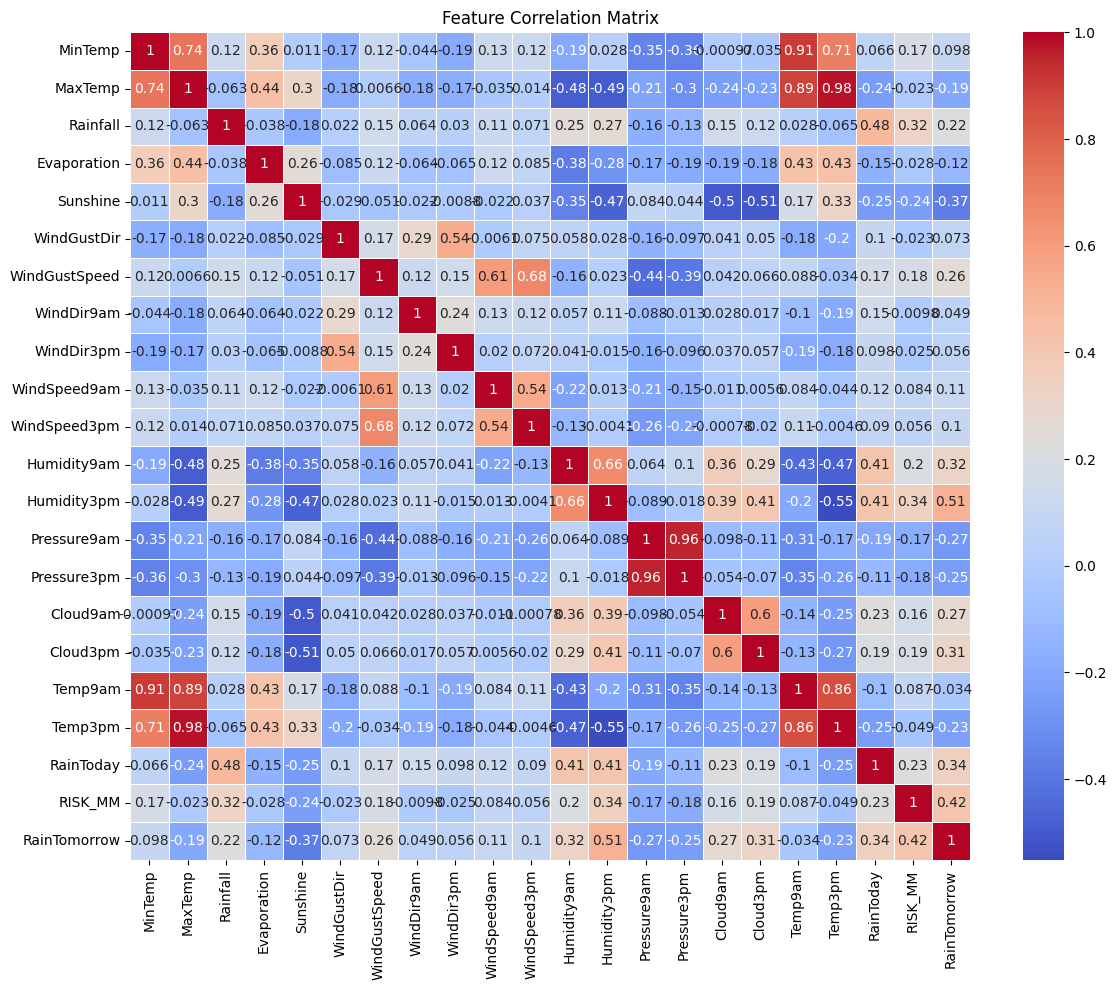

In [31]:
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [32]:
# Median Imputer for continuous features
median_imputer = SimpleImputer(strategy='median')
df[["RISK_MM", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "WindGustSpeed"]] = median_imputer.fit_transform(df[["RISK_MM", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "WindGustSpeed"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["RainToday"]] = mode_imputer.fit_transform(df[["RainToday"]])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 26599
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           220632 non-null  datetime64[ns]
 1   Location       220632 non-null  object        
 2   MinTemp        219550 non-null  float64       
 3   MaxTemp        220161 non-null  float64       
 4   Rainfall       220632 non-null  float64       
 5   Evaporation    220632 non-null  float64       
 6   Sunshine       220632 non-null  float64       
 7   WindGustDir    220632 non-null  float64       
 8   WindGustSpeed  220632 non-null  float64       
 9   WindDir9am     220632 non-null  float64       
 10  WindDir3pm     220632 non-null  float64       
 11  WindSpeed9am   218426 non-null  float64       
 12  WindSpeed3pm   216279 non-null  float64       
 13  Humidity9am    220632 non-null  float64       
 14  Humidity3pm    220632 non-null  float64       
 15  Pressu

In [34]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


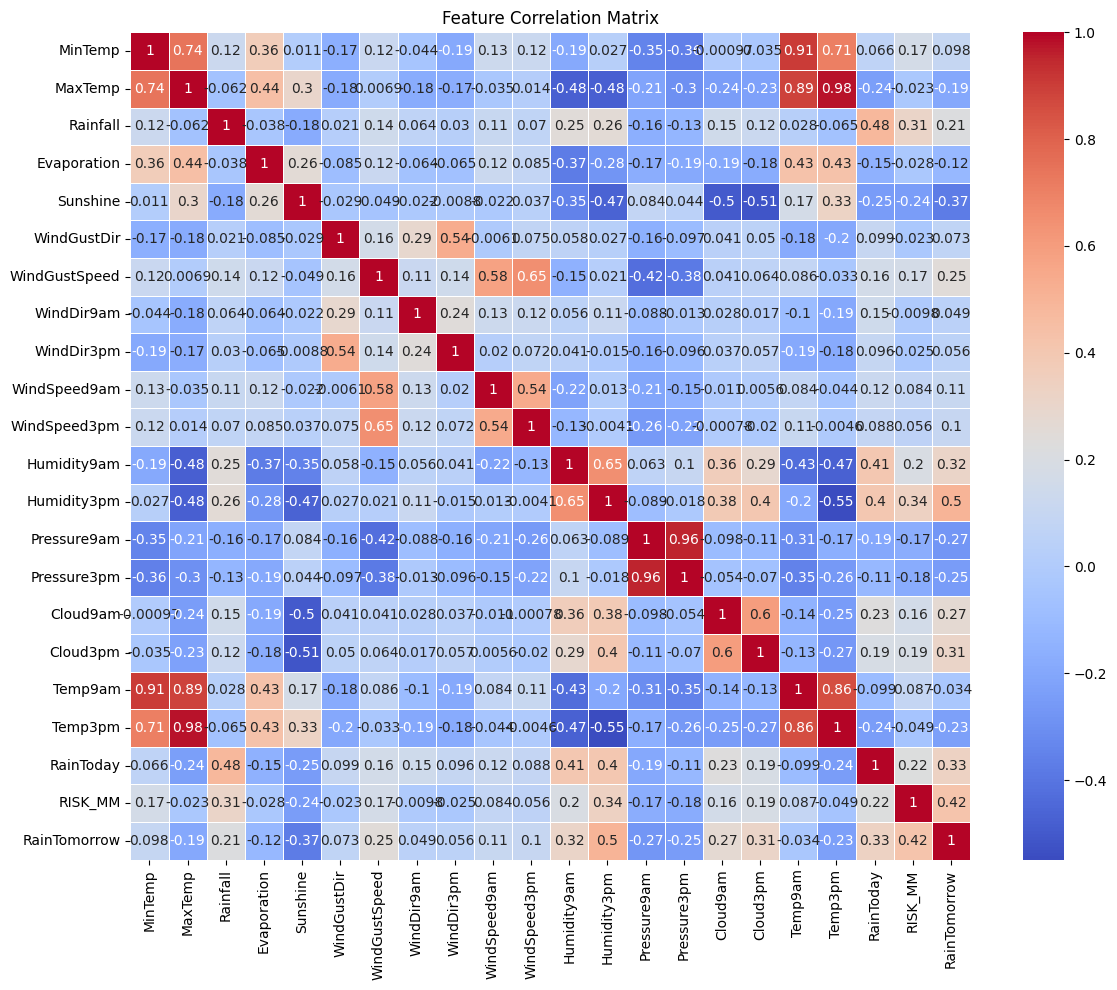

In [35]:
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [36]:
df.dropna(inplace=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [38]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,0.516509,0.523629,0.001617,0.051044,0.468966,0.800000,0.294574,0.800000,...,0.22,0.449587,0.4800,0.888889,0.777778,0.508439,0.522073,0.0,0.000000,0.0
1,2008-12-02,Albury,0.375000,0.565217,0.000000,0.051044,0.468966,0.866667,0.294574,1.000000,...,0.25,0.497521,0.4912,0.777778,0.777778,0.514768,0.570058,0.0,0.000000,0.0
2,2008-12-03,Albury,0.504717,0.576560,0.000000,0.051044,0.468966,0.733333,0.310078,0.800000,...,0.30,0.447934,0.5056,0.777778,0.222222,0.594937,0.548944,0.0,0.000000,0.0
3,2008-12-04,Albury,0.417453,0.620038,0.000000,0.051044,0.468966,0.133333,0.139535,0.400000,...,0.16,0.613223,0.5712,0.777778,0.777778,0.533755,0.612284,0.0,0.002695,0.0
4,2008-12-05,Albury,0.613208,0.701323,0.002695,0.051044,0.468966,0.800000,0.271318,0.200000,...,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.000539,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130416,2010-06-08,Launceston,0.226415,0.313800,0.001078,0.051044,0.468966,0.866667,0.054264,0.000000,...,0.98,0.654545,0.5792,0.777778,0.777778,0.236287,0.285988,0.0,0.023720,1.0
114384,2016-08-08,PearceRAAF,0.426887,0.370510,0.031806,0.051044,0.296552,0.800000,0.488372,0.866667,...,0.71,0.576860,0.6176,0.888889,0.888889,0.392405,0.345489,1.0,0.014555,1.0
84962,2009-03-18,Cairns,0.785377,0.686200,0.000000,0.062645,0.234483,0.400000,0.325581,0.466667,...,0.60,0.464463,0.4656,0.555556,0.666667,0.757384,0.685221,0.0,0.026415,1.0
54992,2012-08-17,Ballarat,0.299528,0.240076,0.030728,0.051044,0.468966,0.666667,0.441860,1.000000,...,0.93,0.276033,0.3488,0.888889,0.888889,0.248945,0.234165,1.0,0.049596,1.0


In [39]:
features = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = df['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [40]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model_name, model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("--------SUMMARY--------")
    print("-----------------------")
    print("Model = {}".format(model_name))
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                               cmap=plt.cm.Blues,
                                               normalize='all')
    disp.plot()
    plt.show()
    print("--------END--------")

    return model, accuracy, roc_auc, coh_kap, time_taken

--------SUMMARY--------
-----------------------
Model = Logistic Regression
Accuracy = 0.7782761273856663
ROC Area under Curve = 0.7782329565202105
Cohen's Kappa = 0.5565115393290149
Time taken = 75.55094981193542
              precision    recall  f1-score   support

         0.0    0.77188   0.79201   0.78181     26727
         1.0    0.78506   0.76446   0.77462     26560

    accuracy                        0.77828     53287
   macro avg    0.77847   0.77823   0.77822     53287
weighted avg    0.77845   0.77828   0.77823     53287



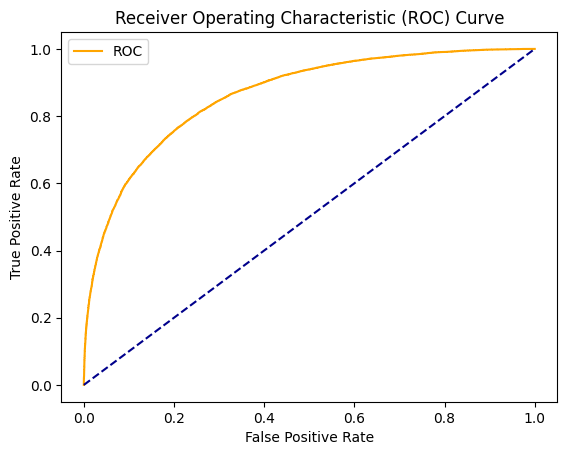

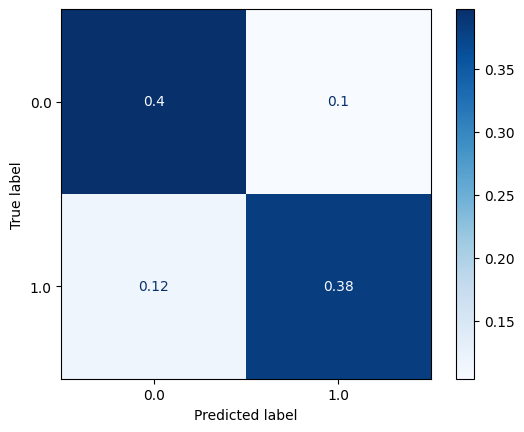

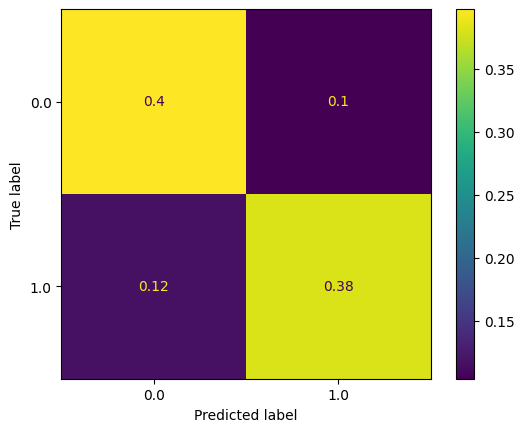

--------END--------
--------SUMMARY--------
-----------------------
Model = Decision Tree
Accuracy = 0.833524124082797
ROC Area under Curve = 0.8336047692847943
Cohen's Kappa = 0.6670997602217998
Time taken = 0.637338399887085
              precision    recall  f1-score   support

         0.0    0.85250   0.80787   0.82958     26727
         1.0    0.81634   0.85934   0.83729     26560

    accuracy                        0.83352     53287
   macro avg    0.83442   0.83360   0.83344     53287
weighted avg    0.83447   0.83352   0.83342     53287



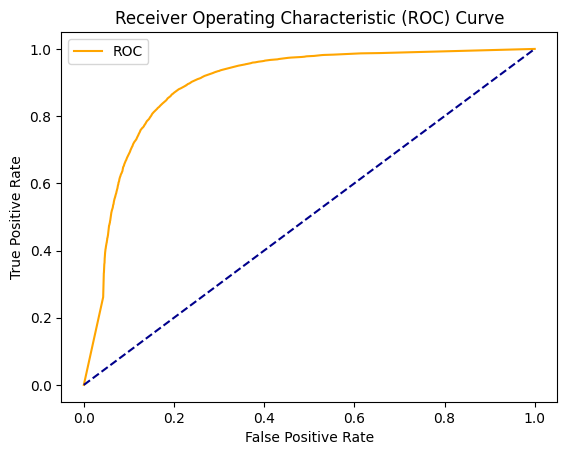

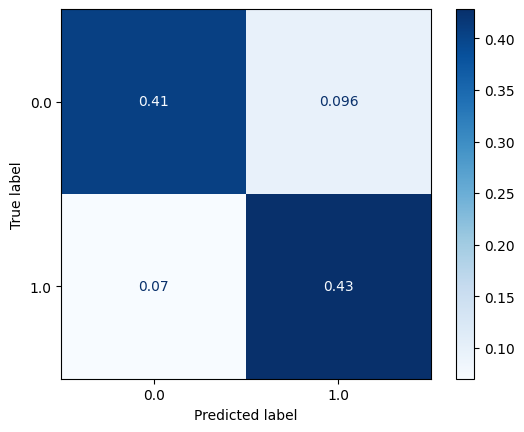

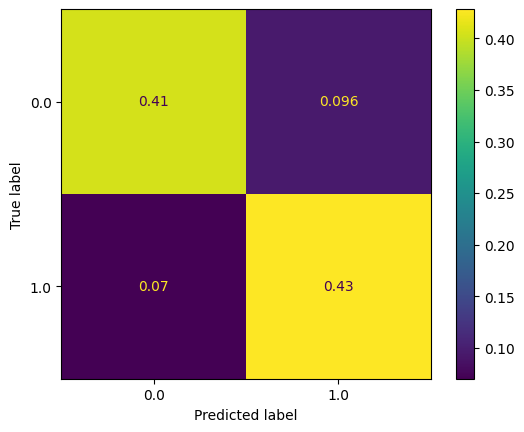

--------END--------
--------SUMMARY--------
-----------------------
Model = Random Forest Classifier
Accuracy = 0.8910616097734907
ROC Area under Curve = 0.8911329394071966
Cohen's Kappa = 0.7821526237189144
Time taken = 42.964608907699585
              precision    recall  f1-score   support

         0.0    0.91030   0.86837   0.88884     26727
         1.0    0.87341   0.91389   0.89319     26560

    accuracy                        0.89106     53287
   macro avg    0.89186   0.89113   0.89102     53287
weighted avg    0.89191   0.89106   0.89101     53287



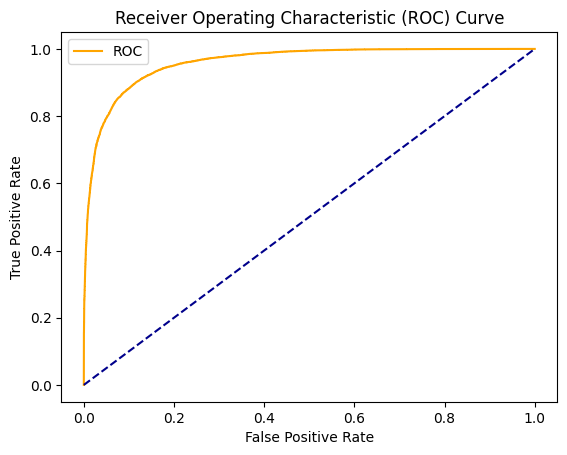

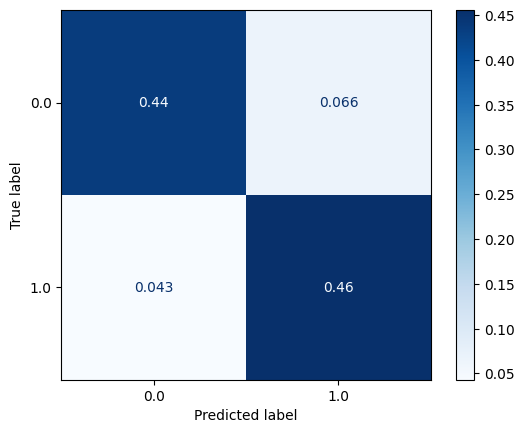

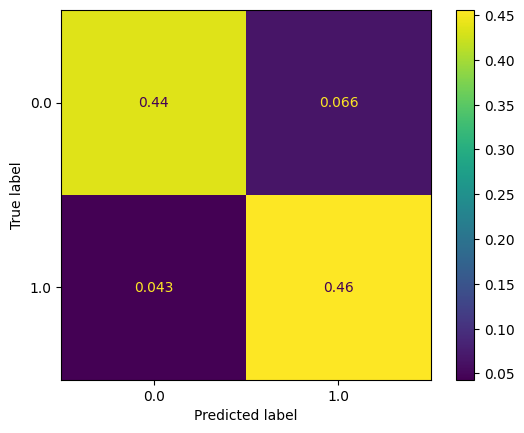

--------END--------
[LightGBM] [Info] Number of positive: 79604, number of negative: 80256
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2588
[LightGBM] [Info] Number of data points in the train set: 159860, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497961 -> initscore=-0.008157
[LightGBM] [Info] Start training from score -0.008157
--------SUMMARY--------
-----------------------
Model = LGB Classifier
Accuracy = 0.8312721676956857
ROC Area under Curve = 0.8312882133822077
Cohen's Kappa = 0.6625529685316716
Time taken = 8.852141857147217
              precision    recall  f1-score   support

         0.0    0.83558   0.82617   0.83085     26727
         1.0    0.82704   0.83641   0.83170     26560

    accuracy                        0.83127     

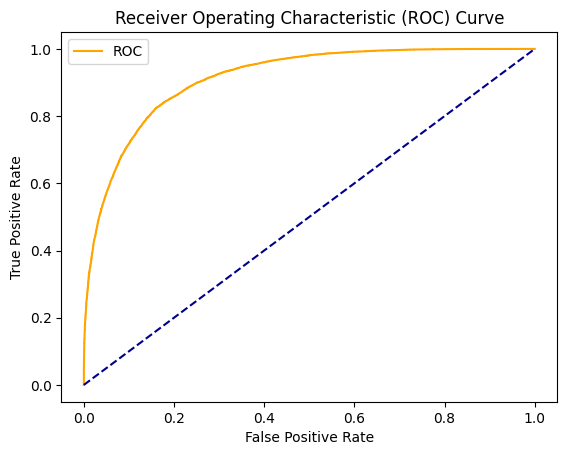

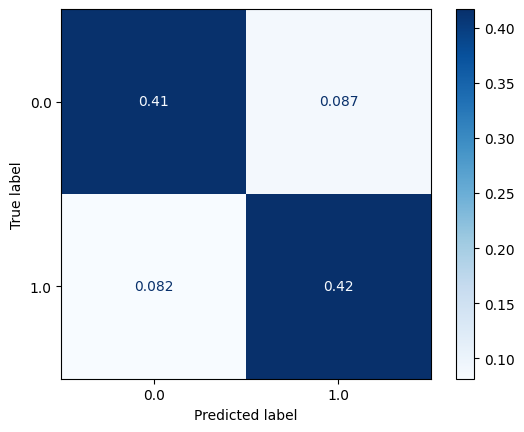

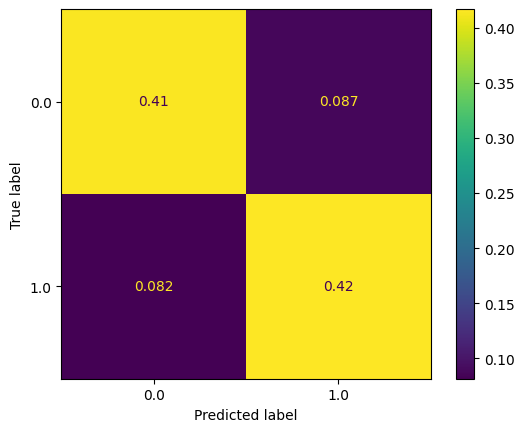

--------END--------
--------SUMMARY--------
-----------------------
Model = CAT Boost Classifier
Accuracy = 0.9230018578640193
ROC Area under Curve = 0.9231371375895319
Cohen's Kappa = 0.8460440902847004
Time taken = 159.38334369659424
              precision    recall  f1-score   support

         0.0    0.96334   0.87997   0.91977     26727
         1.0    0.88889   0.96630   0.92598     26560

    accuracy                        0.92300     53287
   macro avg    0.92612   0.92314   0.92288     53287
weighted avg    0.92623   0.92300   0.92287     53287



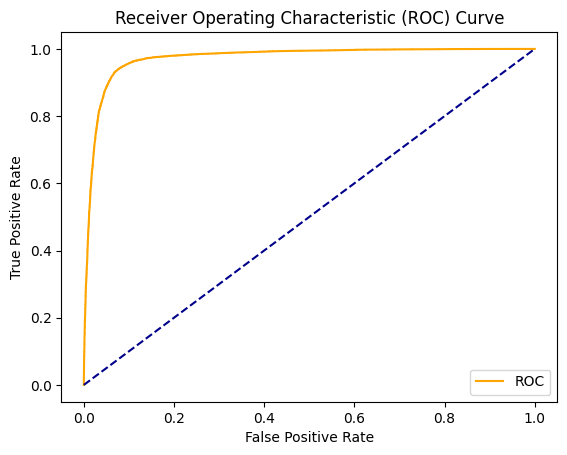

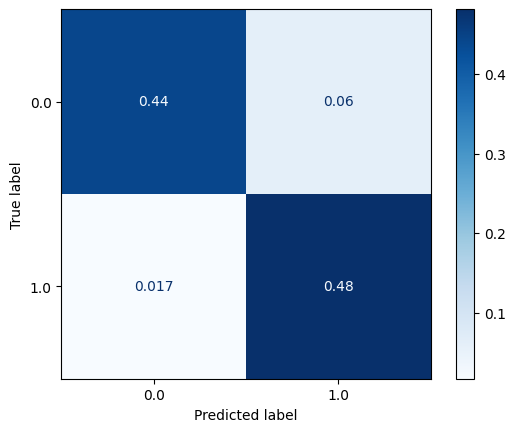

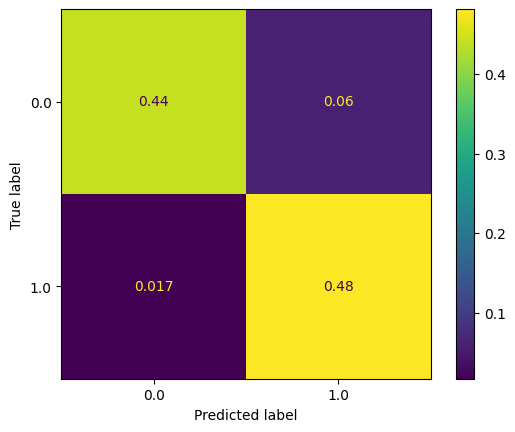

--------END--------
--------SUMMARY--------
-----------------------
Model = XGBoost Classifier
Accuracy = 0.9434008294706026
ROC Area under Curve = 0.9434986099972907
Cohen's Kappa = 0.8868228060045887
Time taken = 32.969520807266235
              precision    recall  f1-score   support

         0.0    0.97318   0.91230   0.94176     26727
         1.0    0.91697   0.97470   0.94496     26560

    accuracy                        0.94340     53287
   macro avg    0.94508   0.94350   0.94336     53287
weighted avg    0.94516   0.94340   0.94335     53287



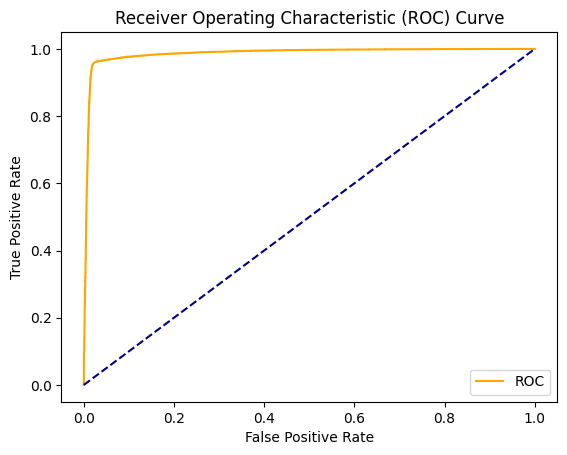

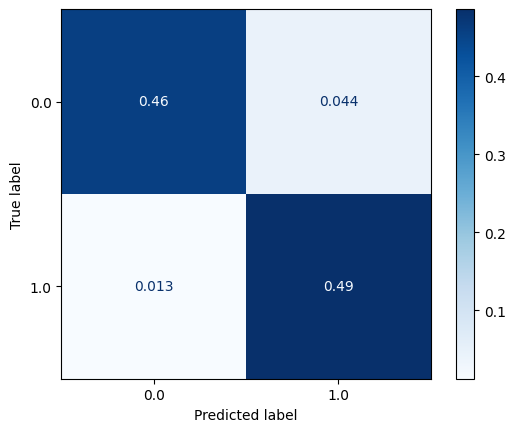

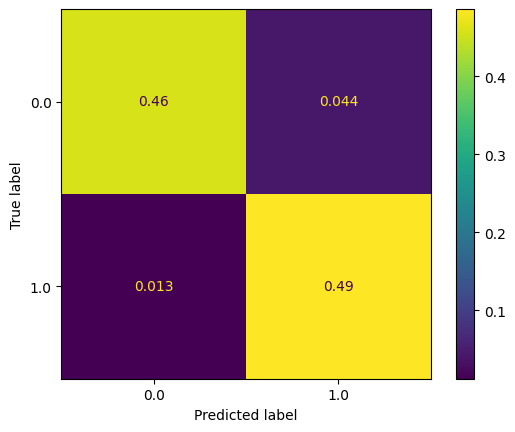

--------END--------


In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model("Logistic Regression",model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model("Decision Tree", model_dt, X_train, y_train, X_test, y_test)

# Neural Network
# from sklearn.neural_network import MLPClassifier

# params_nn = {'hidden_layer_sizes': (30,30,30),
#              'activation': 'logistic',
#              'solver': 'lbfgs',
#              'max_iter': 500}

# model_nn = MLPClassifier(**params_nn)
# model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model("Random Forest Classifier",model_rf, X_train, y_train, X_test, y_test)

# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95,
         'max_depth': 16,
         'min_split_gain': 0.1,
         'n_estimators': 200,
         'num_leaves': 50,
         'reg_alpha': 1.2,
         'reg_lambda': 1.2,
         'subsample': 0.95,
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model("LGB Classifier", model_lgb, X_train, y_train, X_test, y_test)

# Catboost

import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model("CAT Boost Classifier",model_cb, X_train, y_train, X_test, y_test, verbose=False)

# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model("XGBoost Classifier", model_xgb, X_train, y_train, X_test, y_test)


<ipython-input-43-99872b995112>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')


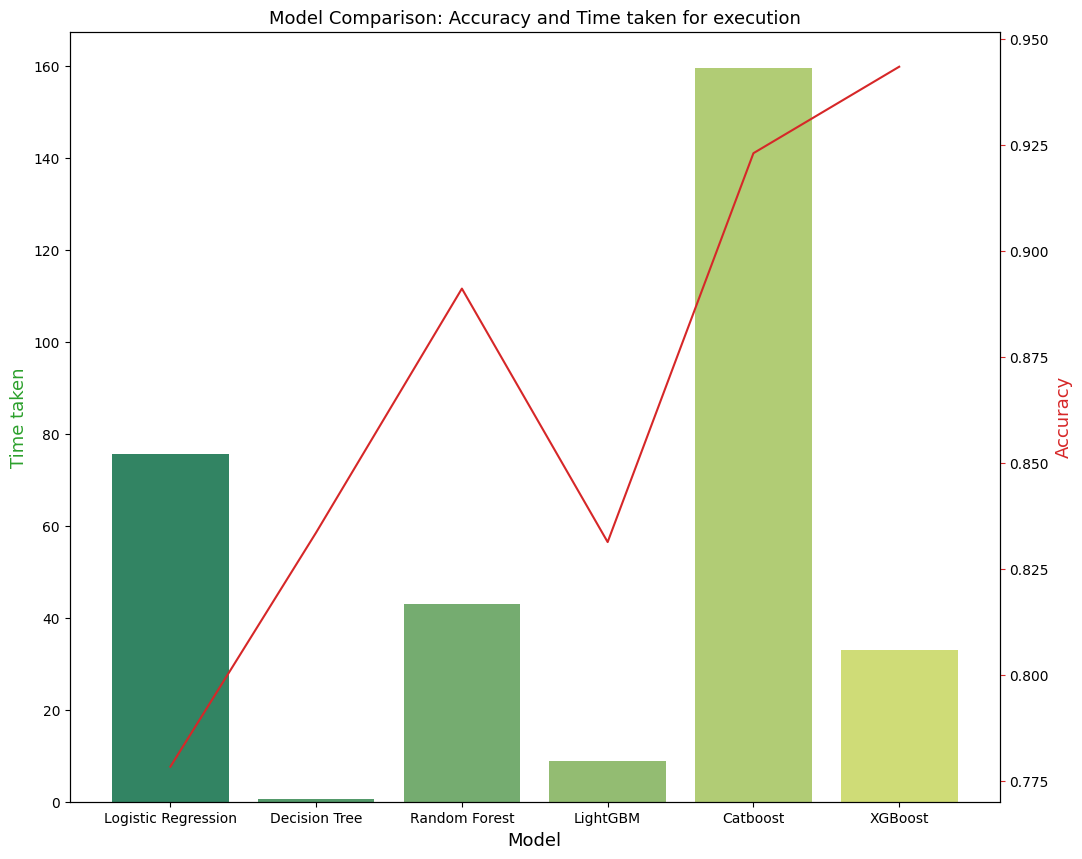

In [43]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb] #accuracy_nn
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb] #roc_auc_nn,
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb] #coh_kap_nn
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_cb, tt_xgb] #tt_nn

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt} #'Neural Network'
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)